In [1]:
# Standard Data Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.shape

(165034, 14)

In [4]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
train_df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
train_df.isnull().values.any()

False

In [7]:
train_df["Surname"] = train_df["Surname"].str.strip()
train_df["Surname"] = train_df["Surname"].apply(str.lower) 
train_df["Geography"] = train_df["Geography"].str.strip()
train_df["Geography"] = train_df["Geography"].apply(str.lower) 
train_df["Gender"] = train_df["Gender"].str.strip()
train_df["Gender"] = train_df["Gender"].apply(str.lower) 

In [8]:
label = train_df["Exited"].values

features = train_df[["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]].values

split = (0.7,0.3)
shuffle = np.random.permutation(np.arange(features.shape[0]))
features, label = features[shuffle], label[shuffle]


splits = np.multiply(len(features), split).astype(int) 
train_features, val_features = np.split(features, [splits[0]])
train_label, val_label = np.split(label, [splits[0]])

In [9]:
#histgrams of features and labels

train_set = pd.concat([pd.DataFrame(train_features), pd.DataFrame(train_label)], axis=1)

train_set.columns = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]

for i in train_set.columns:
    display(train_set[i].value_counts())

CreditScore
850    1770
678    1625
684    1227
667    1139
705    1116
       ... 
419       1
448       1
383       1
436       1
373       1
Name: count, Length: 455, dtype: int64

Geography
france     66049
spain      25205
germany    24269
Name: count, dtype: int64

Gender
male      65120
female    50403
Name: count, dtype: int64

Age
37.00    6503
38.00    6449
35.00    6394
36.00    6013
34.00    5975
         ... 
83.00       2
85.00       2
84.00       2
36.44       1
32.34       1
Name: count, Length: 71, dtype: int64

Tenure
2     12628
7     12441
8     12248
4     12184
5     12121
9     11735
1     11709
3     11601
6     11180
10     4179
0      3497
Name: count, dtype: int64

Balance
0.00         62615
124577.33       59
127864.40       45
122314.50       43
129855.32       43
             ...  
170600.72        1
125927.18        1
134737.94        1
121788.65        1
170251.68        1
Name: count, Length: 23318, dtype: int64

NumOfProducts
2    58898
1    54252
3     2027
4      346
Name: count, dtype: int64

HasCrCard
1.0    87020
0.0    28503
Name: count, dtype: int64

IsActiveMember
0.0    57946
1.0    57577
Name: count, dtype: int64

EstimatedSalary
88890.05     130
181224.56     73
140941.47     71
90876.95      70
129964.94     68
            ... 
12288.46       1
78680.19       1
137767.17      1
112605.07      1
130142.54      1
Name: count, Length: 42815, dtype: int64

Exited
0    91090
1    24433
Name: count, dtype: int64

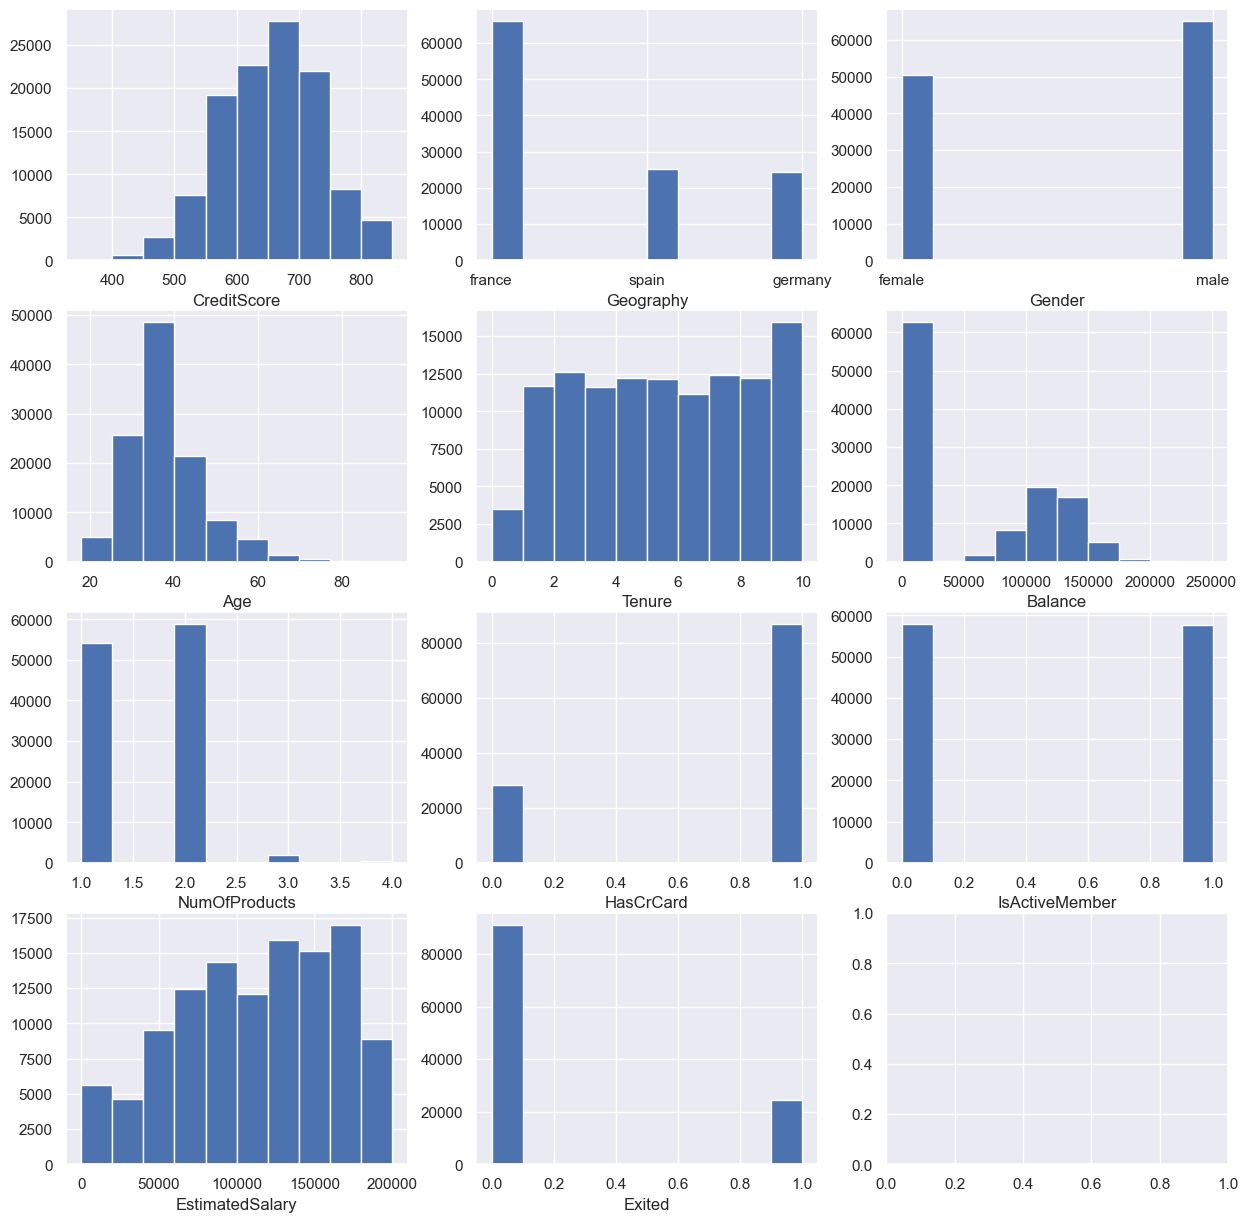

In [10]:
columns = train_set.columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
for idx, ax in enumerate(axes.flatten()):
    if idx >= len(columns):
        break
    # plot histogram
    ax.hist(train_set[columns[idx]])
    # set xlabel
    ax.set_xlabel(columns[idx])

In [11]:
from scipy.stats import shapiro

quantitative_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

alpha = 0.05

for i in quantitative_columns:
    stat, p = shapiro(train_set[i])
    if p > alpha:
        print(f'Variable {i} looks Gaussian (fail to reject H0) at {p:.5f}')
    else:
        print(f'Variable {i} does NOT look Gaussian (reject H0)  at {p:.5f}')

/Users/albertkao/anaconda3/envs/tensorflow/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable CreditScore does NOT look Gaussian (reject H0)  at 0.00000
Variable Age does NOT look Gaussian (reject H0)  at 0.00000
Variable Tenure does NOT look Gaussian (reject H0)  at 0.00000
Variable Balance does NOT look Gaussian (reject H0)  at 0.00000
Variable NumOfProducts does NOT look Gaussian (reject H0)  at 0.00000
Variable EstimatedSalary does NOT look Gaussian (reject H0)  at 0.00000


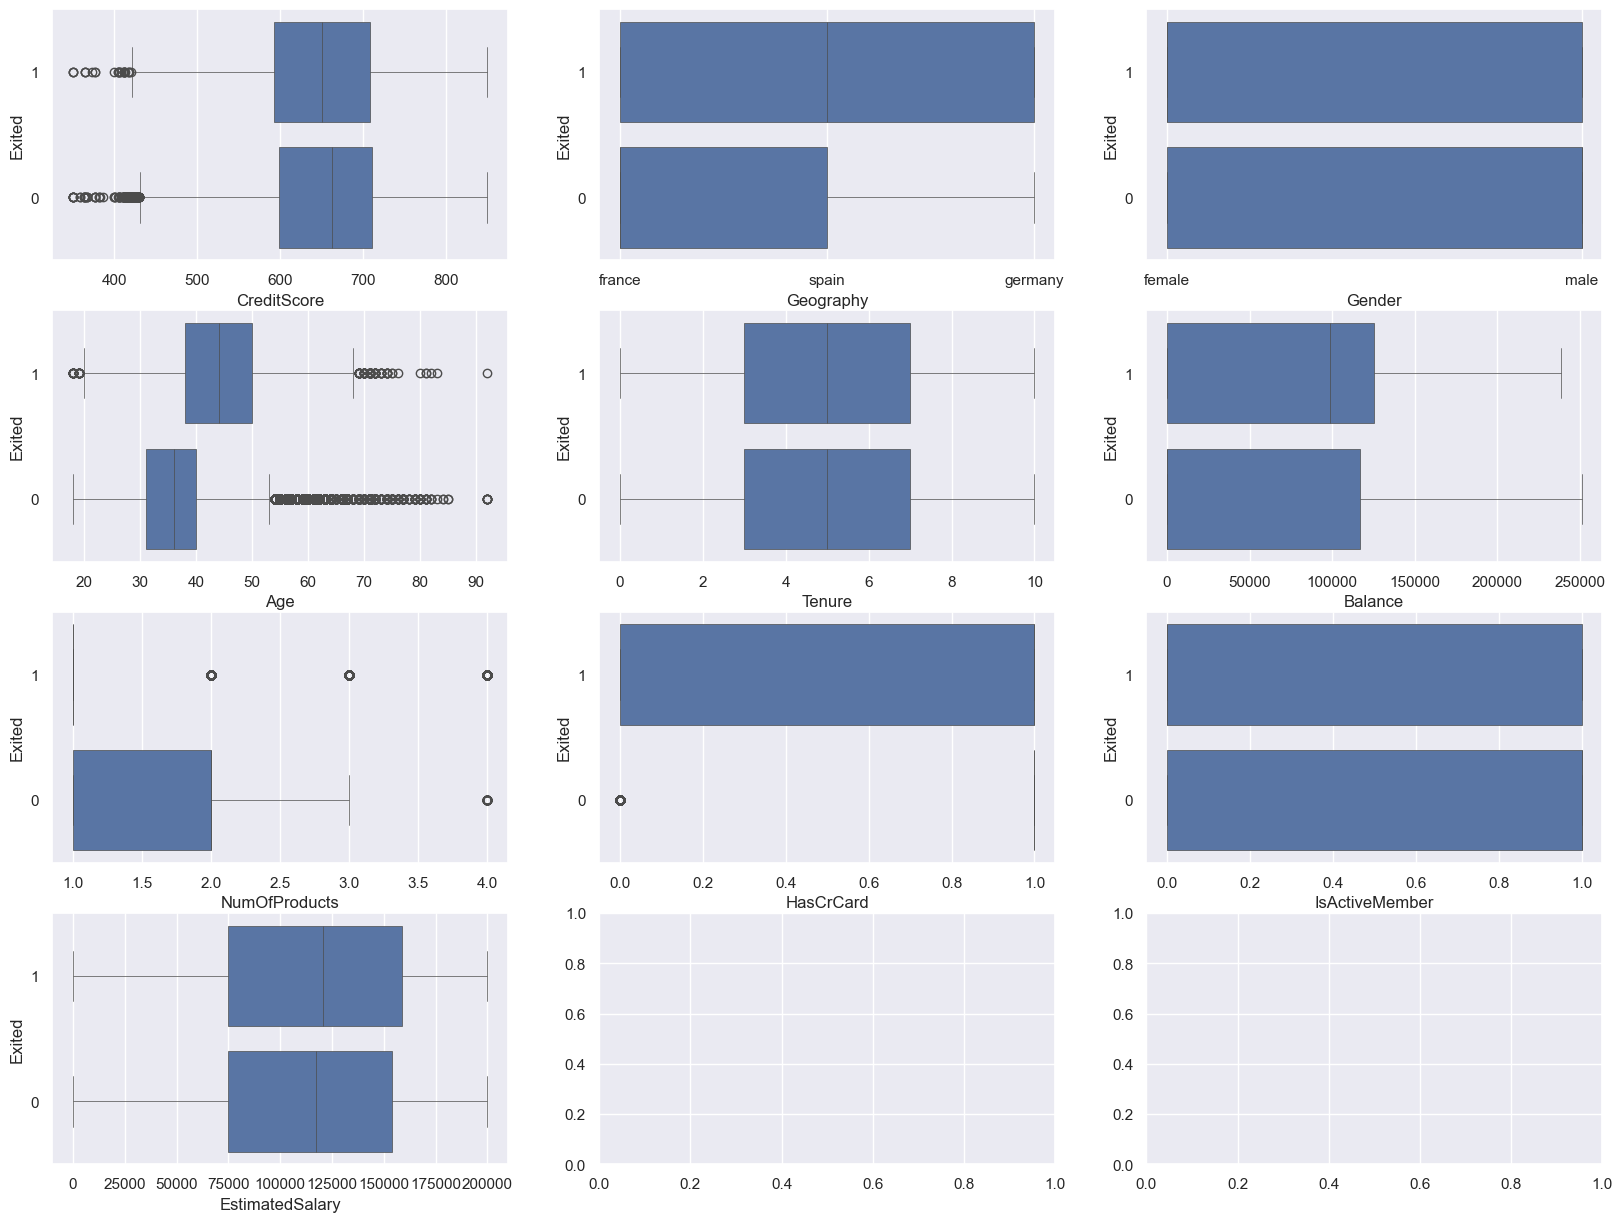

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
for idx, ax in enumerate(axes.flatten()):
    if idx >= (len(columns) - 1):
        break
    feature = train_set[columns[idx]]
    sns.boxplot(x = feature, y = train_set["Exited"], ax = axes[idx // 3][idx % 3], orient='h', linewidth=.5)
    axes[idx//3][idx%3].invert_yaxis()

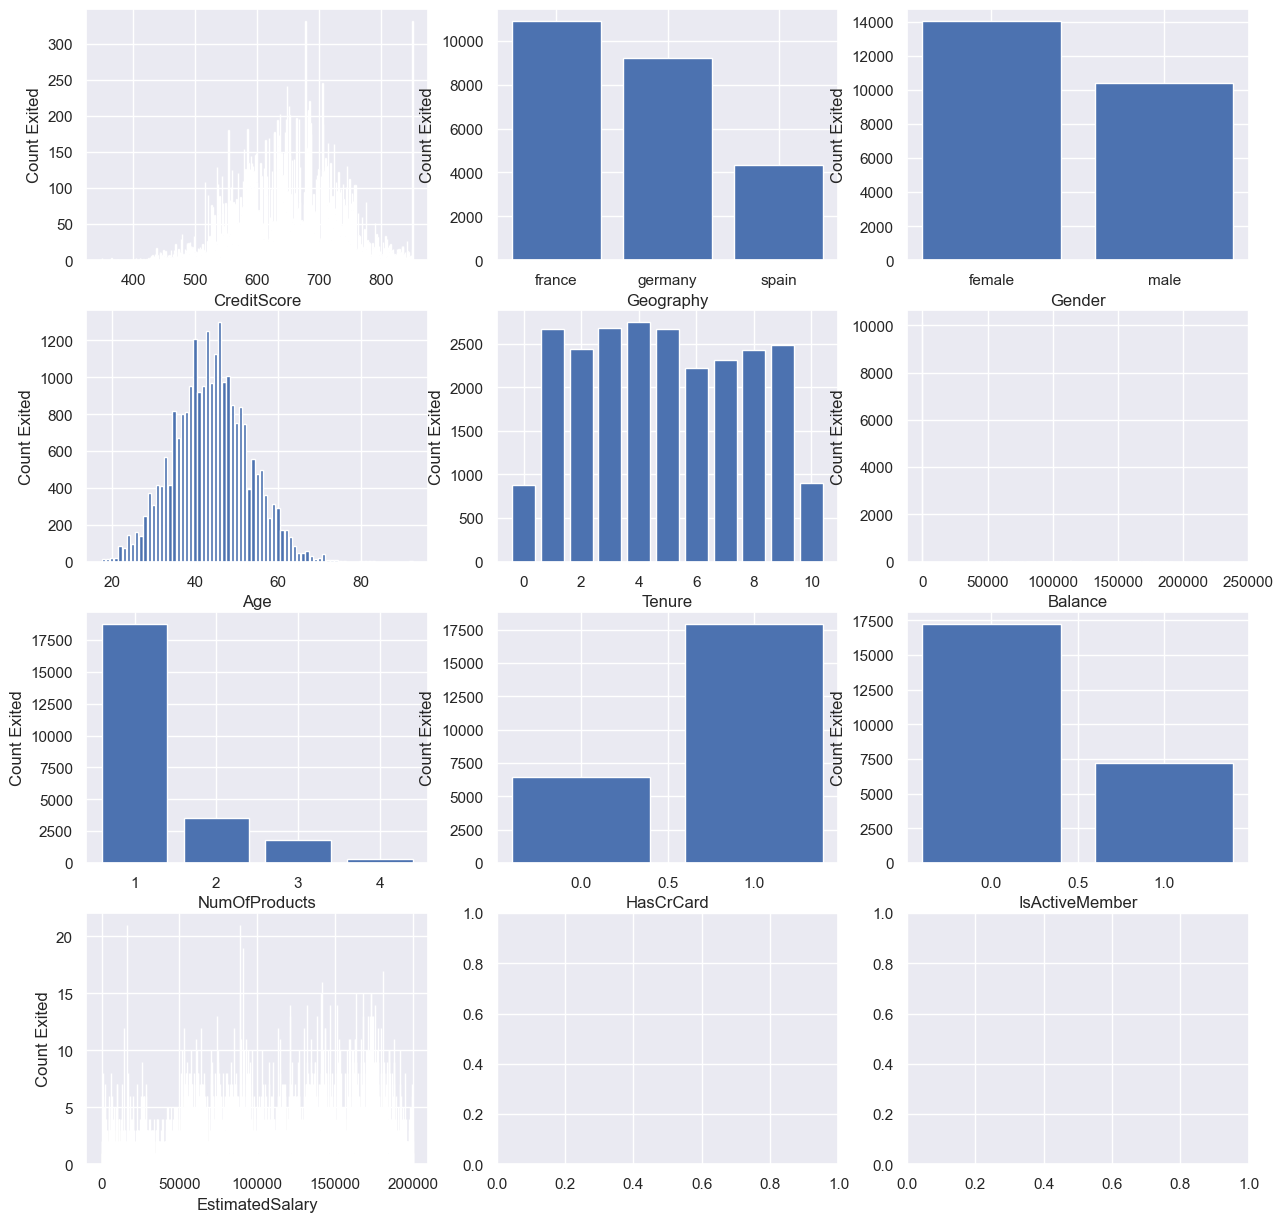

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
for idx, ax in enumerate(axes.flatten()):
    if idx >= (len(columns) - 1):
        break
    temp = train_set[train_set.Exited == 1].groupby(columns[idx]).aggregate("count")["Exited"]
    ax.bar(temp.index, temp.values)
    # set xlabel
    ax.set_xlabel(columns[idx])
    ax.set_ylabel("Count Exited")

In [14]:
from sklearn import preprocessing
import joblib

train_norm = train_set.copy(deep=True)

scaler = preprocessing.MinMaxScaler().fit(train_norm[quantitative_columns])
train_norm[quantitative_columns] = scaler.transform(train_norm[quantitative_columns])

joblib.dump(scaler, "scaler.joblib")

train_norm.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.670,france,female,0.283784,0.2,0.000000,0.333333,1.0,1.0,0.779371,0
1,0.618,spain,male,0.729730,0.4,0.551190,0.000000,1.0,1.0,0.418130,0
2,0.468,france,female,0.297297,0.5,0.000000,0.000000,1.0,0.0,0.567905,0
3,0.456,germany,male,0.148649,0.6,0.572697,0.333333,1.0,0.0,0.700698,0
4,0.790,france,male,0.243243,0.9,0.000000,0.000000,1.0,1.0,0.539375,0


In [15]:
categorical_columns = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]

for i in categorical_columns:
    label_encoder = preprocessing.LabelEncoder().fit(train_norm[i])
    encoder_name = f"{i}_encoder.joblib"
    joblib.dump(label_encoder, encoder_name)
    train_norm[i] = label_encoder.transform(train_norm[i])

train_norm.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.670,0,0,0.283784,0.2,0.000000,0.333333,1,1,0.779371,0
1,0.618,2,1,0.729730,0.4,0.551190,0.000000,1,1,0.418130,0
2,0.468,0,0,0.297297,0.5,0.000000,0.000000,1,0,0.567905,0
3,0.456,1,1,0.148649,0.6,0.572697,0.333333,1,0,0.700698,0
4,0.790,0,1,0.243243,0.9,0.000000,0.000000,1,1,0.539375,0


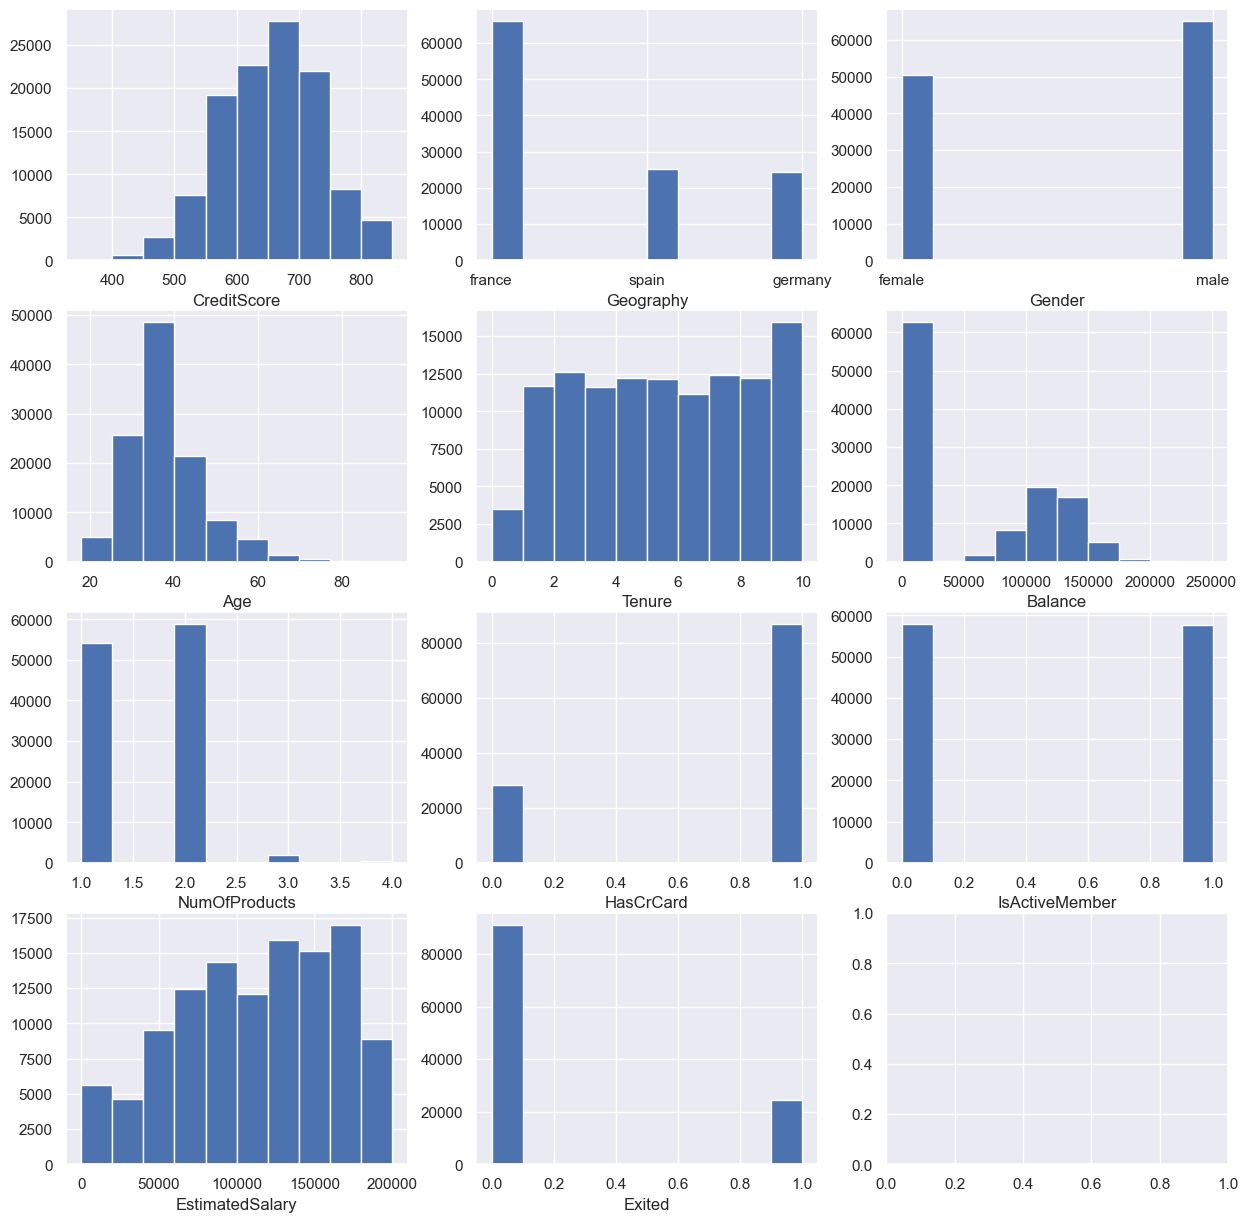

In [16]:
columns = train_set.columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
for idx, ax in enumerate(axes.flatten()):
    if idx >= len(columns):
        break
    # plot histogram
    ax.hist(train_set[columns[idx]])
    # set xlabel
    ax.set_xlabel(columns[idx])

In [17]:
val_set = pd.concat([pd.DataFrame(val_features), pd.DataFrame(val_label)], axis=1)

val_set.columns = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]

scaler = joblib.load("scaler.joblib")

val_norm = val_set.copy(deep=True)

val_norm[quantitative_columns] = scaler.transform(val_norm[quantitative_columns])


for i in categorical_columns:
    encoder_name = f"{i}_encoder.joblib"
    label_encoder = joblib.load(encoder_name)
    val_norm[i] = label_encoder.transform(val_norm[i])

val_norm.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.850,1,1,0.324324,0.5,0.517562,0.000000,1,1,0.767692,0
1,0.790,2,0,0.337838,0.6,0.565155,0.333333,0,0,0.400654,1
2,0.708,1,0,0.351351,0.6,0.526341,0.333333,1,1,0.427090,0
3,0.566,1,0,0.148649,0.5,0.538347,0.333333,1,1,0.599515,0
4,0.434,0,0,0.202703,0.1,0.000000,0.333333,1,1,0.333636,0


In [18]:
train_set.to_csv("train_set.csv")
val_set.to_csv("val_set.csv")

train_norm.to_csv("train_norm_set.csv")
val_norm.to_csv("val_norm_set.csv")